In [35]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('data.csv')
df.head()

,FECHA,PRECIO_ALSEA,PRECIO_BIMBO,MXN_USD,MARGEN_EBITDA_ALSEA,MARGEN_EBITDA_BIMBO,EBITDA_ALSEA_MILLONES,EBITDA_BIMBO_MILLONES
0,4T2006,12.55991538,11.80309849,10.809,16.3,11.7,947,"7,509"
1,1T2007,17.42904202,12.13970538,11.0244,17.0,11.7,"1,052","7,769"
2,2T2007,16.28282047,14.67157061,10.811,16.3,11.4,"1,038","7,713"
3,3T2007,15.51071623,13.4392203,10.926,17.1,11.6,"1,136","8,137"
4,4T2007,13.12577203,14.31506927,10.9195,16.7,11.4,"1,169","8,252"


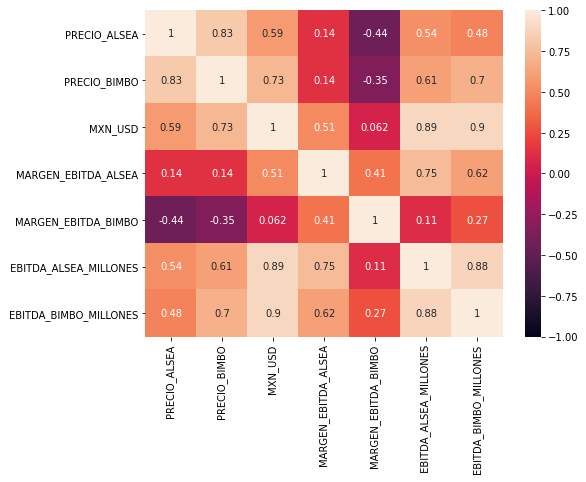

In [37]:
data_df = df.iloc[:59, 1:].replace(',','', regex=True).astype(float)
fig = plt.figure(figsize=(8,6))
sns.heatmap(data_df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

In [43]:
def plot_vars(df, dates, var1, var2):
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Add traces
    fig.add_trace(
    go.Scatter(x=dates, y=data_df[f'{var1}'], name=f"{var1}"),
    secondary_y=False,
    )

    fig.add_trace(
    go.Scatter(x=dates, y=data_df[f'{var2}'], name=f"{var2}"),
    secondary_y=True,
    )

    # Add figure title
    fig.update_layout(
    title_text=f"{var1} vs. {var2}"
    )

    # Set x-axis title
    fig.update_xaxes(title_text="Fecha")

    # Set y-axes titles
    fig.update_yaxes(title_text="Precio acción $MXN", secondary_y=False)
    fig.update_yaxes(title_text="Tipo de cambio $MXN", secondary_y=True)

    fig.update_layout(
    template='plotly_white'
    )

    fig.show()

In [44]:
data_df = df.iloc[:59, 1:].replace(',','')#.replace(',', '', regex=True).astype(float)
plot_vars(data_df, df['FECHA'], 'PRECIO_ALSEA', 'MXN_USD')

In [46]:
plot_vars(data_df, df['FECHA'], 'PRECIO_BIMBO', 'MXN_USD')

In [47]:
plot_vars(data_df, df['FECHA'], 'PRECIO_BIMBO', 'PRECIO_ALSEA')

In [ ]:
$